In [1]:
# import relevant libraries
import sys
import pickle
import pandas as pd

In [2]:
# import custom modules
sys.path.append('scripts')
import cons
from PreProcessData.gen_counties_data import gen_counties_data
from PreProcessData.gen_preaggregate_data import gen_preaggregate_data
from utilities.time_data import time_data
from SeaBornPlots.time_plot import time_plot
from SeaBornPlots.map_plot import map_plot

In [3]:
pre_agg_data_dict = gen_preaggregate_data(return_data = True)

In [4]:
map_data_dict = gen_counties_data(pre_agg_data_dict = pre_agg_data_dict, return_data = True)

# Visualisation Proto-Types

## GIS Heat Map

* West coast experiences significantly more rainfall than the east coast

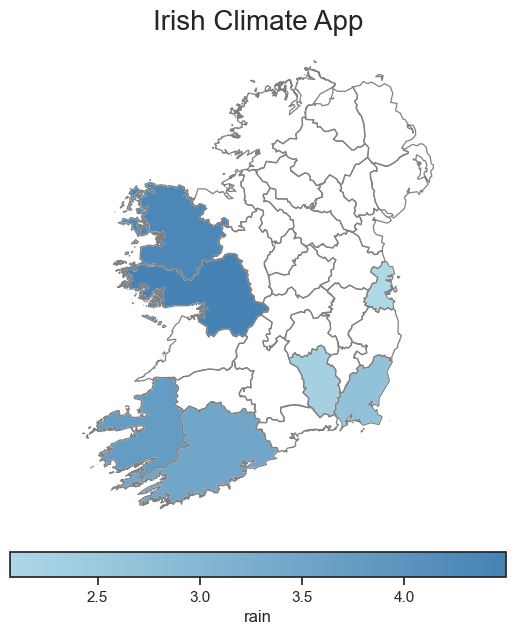

0

In [13]:
map_plot(map_data_dict, stat = 'mean', col = 'rain')

## Time Series Plots

In [14]:
date_strftime_dict = cons.date_strftime_dict
counties = cons.counties
agg_dict = {col:'mean' for col in cons.col_options}

### Yearly Max Termperature by County

In [15]:
# set year strftime pattern and time span
year_strftime = date_strftime_dict['year']
time_span = ['2010', '2019']
# generate the time series data
year_data = time_data(data = pre_agg_data_dict['mean'], agg_dict = agg_dict, time_span = time_span, counties = counties, strftime = year_strftime)

In [16]:
year_data.head()

,county,date,date_str,maxtp,mintp,gmin,soil,wdsp,sun,evap,rain,index
0,cork,2010-01-01,2010,12.532619,5.694609,3.712698,9.882076,8.282018,4.853580,2.121166,2.833315,0
1,cork,2011-01-01,2011,13.361501,6.886868,5.092823,10.942203,9.282623,3.702656,1.898841,2.966225,1
2,cork,2012-01-01,2012,12.992147,7.083889,5.619847,10.920144,8.975398,3.493151,1.523201,3.464922,2
3,cork,2013-01-01,2013,13.236212,6.877090,5.104257,10.939689,9.468962,4.072408,2.037552,3.445134,3
4,cork,2014-01-01,2014,13.903628,7.250819,5.273070,11.457196,9.199430,4.042157,1.990096,3.885571,4


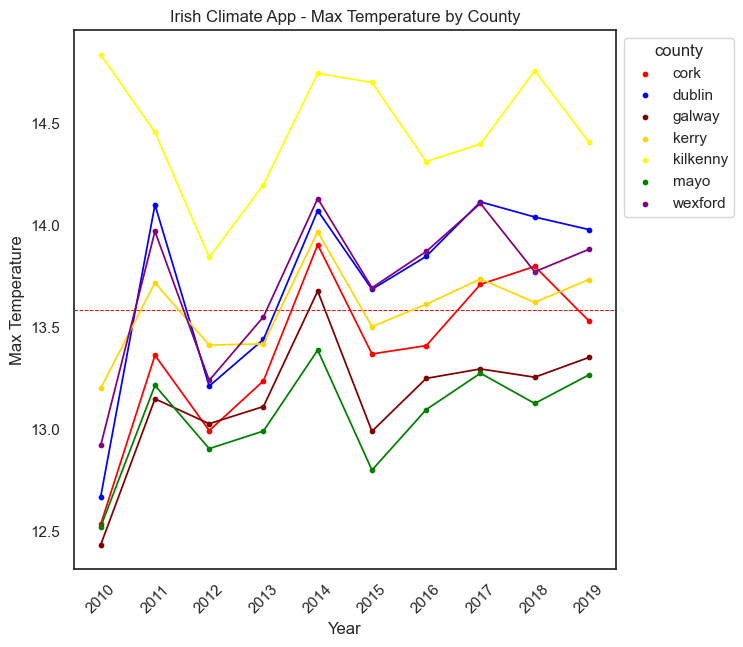

0

In [17]:
time_plot(data = year_data, 
          x = 'index', 
          y = 'maxtp', 
          hue = 'county', 
          strftime = year_strftime, 
          refline = year_data['maxtp'].mean(), 
          title = 'Irish Climate App - Max Temperature by County',
          xlabel = 'Year',
          ylabel = 'Max Temperature'
         )

### Monthly Min Temperature by County

In [18]:
# set month strftime pattern and time span
month_strftime = date_strftime_dict['month']
time_span = ['01', '12']
# generate the time series data
month_data = time_data(data=pre_agg_data_dict['mean'], agg_dict=agg_dict, time_span=time_span, counties=counties, strftime=month_strftime)

In [19]:
month_data.head()

,county,date,date_str,maxtp,mintp,gmin,soil,wdsp,sun,evap,rain,index
0,cork,1900-01-01,01,8.386291,3.460784,0.813164,5.395072,12.233491,1.854946,0.586201,4.777570,0
1,cork,1900-02-01,02,8.499501,3.382787,0.921476,5.469079,12.193439,2.463157,0.968452,3.931130,1
2,cork,1900-03-01,03,9.892618,4.037003,1.548204,6.789918,11.686259,3.568387,1.696700,3.202493,2
3,cork,1900-04-01,04,11.857852,5.141005,2.537113,9.147668,10.535532,5.328525,2.720377,2.586060,3
4,cork,1900-05-01,05,14.321664,7.450601,5.065116,12.421463,10.117272,6.064939,3.613723,2.689414,4


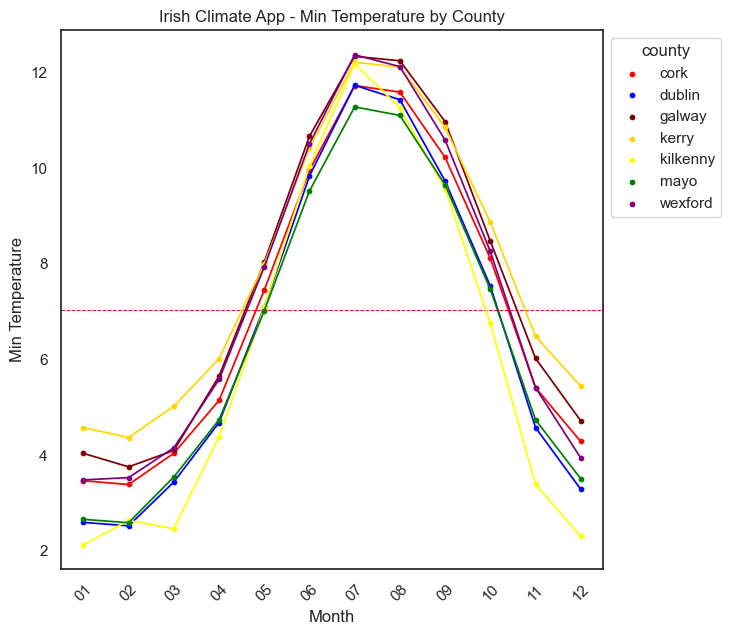

0

In [20]:
time_plot(data = month_data, 
          x = 'index',
          y = 'mintp', 
          hue = 'county', 
          strftime = year_strftime, 
          refline = year_data['mintp'].mean(), 
          title = 'Irish Climate App - Min Temperature by County',
          xlabel = 'Month',
          ylabel = 'Min Temperature'
         )